# **Step 1: Cleaning dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Defining the file path
file_path = "/content/drive/My Drive/Quota Movement Colab/Main Dataset.xlsx"

# Loading the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display first few rows
df.head()

Date                                          Headlines      Newspaper
0 2024-07-03  Anti-quota protestors halt moving train at BAU...    Prothom Alo
1 2024-07-03  Protesters block Shahbagh for 2nd day, demandi...    Prothom Alo
2 2024-07-03  GM Quader: Quota system will undermine discrim...  Dhaka Tribune
3 2024-07-03  Anti-quota protest: BAU students stage demo by...  Dhaka Tribune
4 2024-07-03  Quota movement: JU students block highway for ...  Dhaka Tribune

In [ ]:
import pandas as pd

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verify conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1441 non-null   datetime64[ns]
 1   Headlines  1441 non-null   object        
 2   Newspaper  1441 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 33.9+ KB


In [ ]:
import re

def remove_tags(text):
    """
    Removes known tags like 'quota reform movement', 'bangla blockade', etc.
    including an optional colon (e.g., 'Quota movement:' -> '').
    """
    # List all tags to remove
    tags_to_remove = [
        "quota reform movement",
        "bangla blockade",
        "anti-quota movement",
        "quota reinstatement",
        "quota movement",
        "antiquota protest",
        "quota reform"
    ]
    # a regex pattern that matches these tags with an optional colon
    # using alternation (|) and case-insensitive (re.IGNORECASE)
    pattern = r'(' + '|'.join(tags_to_remove) + r')\:?'

    # Substitute them with an empty string
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    return cleaned_text


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import re

def clean_headline(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove known tags
    text = remove_tags(text)  # using the remove_tags function from above

    # 3. Remove punctuation (anything not a word char or space)
    text = re.sub(r'[^\w\s]', '', text)

    # 4. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 5. Lemmatize
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    cleaned_text = " ".join(lemmatized_words)

    return cleaned_text


In [ ]:
import nltk
nltk.download('punkt_tab')
import nltk
print(nltk.data.path)
nltk.data.path.append('/path/to/your/nltk_data')
nltk.download('punkt')
import nltk
nltk.download('punkt', force=True)

# Apply the cleaning function
df['Headlines'] = df['Headlines'].apply(clean_headline)

# Check
df.head()




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Date                                          Headlines      Newspaper
0 2024-07-03  antiquota protestors halt moving train at bau ...    Prothom Alo
1 2024-07-03  protester block shahbagh for 2nd day demanding...    Prothom Alo
2 2024-07-03  gm quader quota system will undermine discrimi...  Dhaka Tribune
3 2024-07-03  antiquota protest bau student stage demo by ha...  Dhaka Tribune
4 2024-07-03               ju student block highway for 2nd day  Dhaka Tribune

In [ ]:
df.drop_duplicates(subset=['Headlines'], inplace=True)


In [ ]:
df.dropna(inplace=True)  # or df.fillna(...)


In [ ]:
cleaned_file_path = "/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx"
df.to_excel(cleaned_file_path, index=False)

print("✅ Cleaned dataset saved successfully!")


✅ Cleaned dataset saved successfully!


## **Step 2: Word Frequency Analysis**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Loading cleaned data
df = pd.read_excel("/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx")

# Check the first few rows
df.head()


Date                                          Headlines      Newspaper
0 2024-07-03  antiquota protestors halt moving train at bau ...    Prothom Alo
1 2024-07-03  protester block shahbagh for 2nd day demanding...    Prothom Alo
2 2024-07-03  gm quader quota system will undermine discrimi...  Dhaka Tribune
3 2024-07-03  antiquota protest bau student stage demo by ha...  Dhaka Tribune
4 2024-07-03               ju student block highway for 2nd day  Dhaka Tribune

In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load Cleaned Data
df = pd.read_excel("/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx")

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize, remove punctuation and remove stopwords
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to headlines
df["tokens"] = df["Headlines"].apply(preprocess_text)

# to get top frequent words per newspaper
def get_top_words(df, newspaper, top_n=10):
    """ Get top N most frequent words for a given newspaper """
    words = [word for tokens in df[df["Newspaper"] == newspaper]["tokens"] for word in tokens]
    word_counts = Counter(words)
    return pd.DataFrame(word_counts.most_common(top_n), columns=["Word", "Frequency"])

# Get unique newspapers
newspapers = df["Newspaper"].unique()

# a dictionary to store top words for each newspaper
top_words_dict = {newspaper: get_top_words(df, newspaper) for newspaper in newspapers}

# top words for each newspaper
for newspaper, top_words in top_words_dict.items():
    print(f"\n🔹 **Top 10 Words in {newspaper}**")
    print(top_words)

# Save results to Excel
with pd.ExcelWriter("/content/drive/My Drive/Quota Movement Colab/Top_Words_Per_Newspaper.xlsx") as writer:
    for newspaper, top_words in top_words_dict.items():
        top_words.to_excel(writer, sheet_name=newspaper, index=False)

print("✅ Top word frequencies saved successfully!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



🔹 **Top 10 Words in Prothom Alo**
        Word  Frequency
0    student         84
1  protester         59
2     police         44
3      clash         41
4       govt         35
5      quota         35
6    protest         34
7      dhaka         31
8     hasina         26
9         pm         25

🔹 **Top 10 Words in Dhaka Tribune**
         Word  Frequency
0     student        222
1     protest        125
2   protester         98
3       clash         89
4       quota         80
5      police         77
6       dhaka         60
7      league         60
8     injured         60
9  bangladesh         56
✅ Top word frequencies saved successfully!


In [ ]:
import matplotlib.pyplot as plt

def save_table_as_image(top_words_dict, output_path):
    for newspaper, top_words in top_words_dict.items():
        fig, ax = plt.subplots(figsize=(6, 3))  # Adjust figure size
        ax.axis('tight')
        ax.axis('off')

        # Adjust title position to be closer to the table
        ax.set_title(f"Top 10 Most Frequent Words in {newspaper}", fontsize=12, fontweight='bold', pad=10)

        # Create the table and move it upwards
        table = ax.table(cellText=top_words.values, colLabels=top_words.columns,
                         cellLoc='center', loc='center')

        # Adjust table position to reduce gap
        table.scale(1.2, 1.2)  # Scale table to fit better
        plt.subplots_adjust(top=0.8, bottom=0.1)  # Adjust white space

        # Save as an image
        image_file = f"{output_path}/Top_Words_{newspaper.replace(' ', '_')}.png"
        plt.savefig(image_file, bbox_inches="tight", dpi=300)
        plt.close()  # Close figure to prevent display in Colab
        print(f"✅ Saved Table as Image: {image_file}")

# Define output directory
output_directory = "/content/drive/My Drive/Quota Movement Colab"

# Save all tables as images
save_table_as_image(top_words_dict, output_directory)


✅ Saved Table as Image: /content/drive/My Drive/Quota Movement Colab/Top_Words_Prothom_Alo.png
✅ Saved Table as Image: /content/drive/My Drive/Quota Movement Colab/Top_Words_Dhaka_Tribune.png


## **TF-IDF Count**

In [ ]:
!pip install scikit-learn pandas nltk

import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load Cleaned Data
df = pd.read_excel("/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx")

# Rename columns for consistency
df.rename(columns={'Headlines': 'headline', 'Newspaper': 'newspaper'}, inplace=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply text preprocessing
df["processed_headline"] = df["headline"].apply(preprocess_text)


In [ ]:
# Group headlines by newspaper
newspaper_texts = df.groupby("newspaper")["processed_headline"].apply(lambda x: " ".join(x))

# Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=20)  # Get top 20 words
tfidf_matrix = vectorizer.fit_transform(newspaper_texts)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=newspaper_texts.index, columns=vectorizer.get_feature_names_out())

# Transpose to see top words per newspaper
tfidf_df = tfidf_df.T

# Display top words
print("🔹 **Top TF-IDF Words Per Newspaper**")
print(tfidf_df)


🔹 **Top TF-IDF Words Per Newspaper**
newspaper   Dhaka Tribune  Prothom Alo
attack           0.096216     0.105551
bangladesh       0.158473     0.131939
block            0.138664     0.118745
clash            0.251859     0.270475
court            0.116025     0.085760
dhaka            0.169793     0.204506
du               0.113195     0.079164
govt             0.118855     0.230894
hasina           0.101876     0.171521
injured          0.169793     0.092357
killed           0.110365     0.158327
league           0.169793     0.098954
movement         0.099046     0.138536
pm               0.135834     0.164924
police           0.217900     0.290266
protest          0.353735     0.224297
protester        0.277328     0.389221
quota            0.226390     0.230894
student          0.628233     0.554145
violence         0.099046     0.098954


In [ ]:
# Save as Excel
tfidf_df.to_excel("/content/drive/My Drive/Quota Movement Colab/TFIDF_Results.xlsx")

# Save as CSV
tfidf_df.to_csv("/content/drive/My Drive/Quota Movement Colab/TFIDF_Results.csv")

print("✅ TF-IDF results saved successfully!")


✅ TF-IDF results saved successfully!


# **Cosine Similarity**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine all headlines per newspaper
newspaper_corpus = df.groupby("newspaper")["headline"].apply(" ".join)

# Vectorize text
vectorizer = CountVectorizer(stop_words="english")
newspaper_matrix = vectorizer.fit_transform(newspaper_corpus)

# Compute Cosine Similarity
similarity_matrix = cosine_similarity(newspaper_matrix)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=newspaper_corpus.index, columns=newspaper_corpus.index)

print("🔹 **Cosine Similarity Between Newspapers**")
print(similarity_df)

# Save as Excel
similarity_df.to_excel("/content/drive/My Drive/Quota Movement Colab/SIMILARITY_DF_Results.xlsx")

# Save as CSV
similarity_df.to_csv("/content/drive/My Drive/Quota Movement Colab/SIMILARITY_DF_Results.csv")

print("✅ TF-IDF results saved successfully!")

🔹 **Cosine Similarity Between Newspapers**
newspaper      Dhaka Tribune  Prothom Alo
newspaper                                
Dhaka Tribune        1.00000      0.86493
Prothom Alo          0.86493      1.00000
✅ TF-IDF results saved successfully!


# **Sentiment Score claculation**

In [ ]:
#Library instllation
!pip install nltk pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download NLTK Sentiment Analysis tool
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Loading dataset
df = pd.read_excel("/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx")

# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month-year for grouping
df['month'] = df['date'].dt.to_period('M')  # Example: "2024-01" for January 2024


In [ ]:
# Initialize Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment score for each headline
df['sentiment'] = df['Headlines'].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# Display first few rows with sentiment scores
df[['date', 'Headlines', 'sentiment']].head()


date                                          Headlines  sentiment
0 2024-07-03  antiquota protestors halt moving train at bau ...     0.0000
1 2024-07-03  protester block shahbagh for 2nd day demanding...    -0.5859
2 2024-07-03  gm quader quota system will undermine discrimi...    -0.2960
3 2024-07-03  antiquota protest bau student stage demo by ha...    -0.2500
4 2024-07-03               ju student block highway for 2nd day    -0.4404

In [ ]:
#Save Sentiment Scores for All Headlines
#Define output file paths
output_file_excel = "/content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores.xlsx"
output_file_csv = "/content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores.csv"

# Save the dataset with sentiment scores
df.to_excel(output_file_excel, index=False)
df.to_csv(output_file_csv, index=False)

print(f"✅ Sentiment scores for all headlines saved as Excel: {output_file_excel}")
print(f"✅ Sentiment scores for all headlines saved as CSV: {output_file_csv}")


✅ Sentiment scores for all headlines saved as Excel: /content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores.xlsx
✅ Sentiment scores for all headlines saved as CSV: /content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores.csv


In [ ]:
# Group sentiment scores by month
sentiment_trend = df.groupby('month')['sentiment'].mean()

# Convert period to string for saving & plotting
sentiment_trend.index = sentiment_trend.index.astype(str)

# Display sentiment trend
print(sentiment_trend.head())


month
2024-07   -0.223934
2024-08   -0.171050
Name: sentiment, dtype: float64


In [ ]:
# Define output file paths
output_excel = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.xlsx"
output_csv = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.csv"

# Save sentiment trend data
sentiment_trend.to_frame().to_excel(output_excel)  # Convert Series to DataFrame before saving
sentiment_trend.to_frame().to_csv(output_csv)

print(f"✅ Sentiment trend saved as Excel: {output_excel}")
print(f"✅ Sentiment trend saved as CSV: {output_csv}")


✅ Sentiment trend saved as Excel: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.xlsx
✅ Sentiment trend saved as CSV: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.csv


In [ ]:
# Define output path for image
output_image = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.png"

# Create sentiment trend graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=sentiment_trend.index, y=sentiment_trend.values, marker="o", color="blue")

# Formatting
plt.xticks(rotation=45)
plt.axhline(0, linestyle="dashed", color="gray")  # Neutral sentiment line
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend of Headlines Over Time")

# Save the figure
plt.savefig(output_image, bbox_inches="tight", dpi=300)
plt.show()

print(f"✅ Sentiment trend graph saved as PNG: {output_image}")


✅ Sentiment trend graph saved as PNG: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend.png


# **Sentiment score for each newspaper**

In [ ]:
#Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Compute sentiment score for each headline
df['sentiment'] = df['Headlines'].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# Display first few rows with sentiment scores
df[['date', 'Newspaper', 'Headlines', 'sentiment']].head()


date      Newspaper  \
0 2024-07-03    Prothom Alo   
1 2024-07-03    Prothom Alo   
2 2024-07-03  Dhaka Tribune   
3 2024-07-03  Dhaka Tribune   
4 2024-07-03  Dhaka Tribune   

                                           Headlines  sentiment  
0  antiquota protestors halt moving train at bau ...     0.0000  
1  protester block shahbagh for 2nd day demanding...    -0.5859  
2  gm quader quota system will undermine discrimi...    -0.2960  
3  antiquota protest bau student stage demo by ha...    -0.2500  
4               ju student block highway for 2nd day    -0.4404

In [ ]:
#Save Sentiment Scores for Each Newspaper
# Define output file paths
output_file_excel = "/content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores_By_Newspaper.xlsx"
output_file_csv = "/content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores_By_Newspaper.csv"

# Save the dataset with sentiment scores
df.to_excel(output_file_excel, index=False)
df.to_csv(output_file_csv, index=False)

print(f"✅ Sentiment scores for all headlines (per newspaper) saved as Excel: {output_file_excel}")
print(f"✅ Sentiment scores for all headlines (per newspaper) saved as CSV: {output_file_csv}")


✅ Sentiment scores for all headlines (per newspaper) saved as Excel: /content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores_By_Newspaper.xlsx
✅ Sentiment scores for all headlines (per newspaper) saved as CSV: /content/drive/My Drive/Quota Movement Colab/Headline_Sentiment_Scores_By_Newspaper.csv


In [ ]:
# Group sentiment scores by month & newspaper
sentiment_trend = df.groupby(['month', 'Newspaper'])['sentiment'].mean().unstack()

# Convert period to string for saving & plotting
sentiment_trend.index = sentiment_trend.index.astype(str)

# Display sentiment trend
print(sentiment_trend.head())


Newspaper  Dhaka Tribune  Prothom Alo
month                                
2024-07        -0.233005    -0.206090
2024-08        -0.190914    -0.137908


In [ ]:
# Define output file paths
output_excel = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.xlsx"
output_csv = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.csv"

# Save sentiment trend data
sentiment_trend.to_excel(output_excel)
sentiment_trend.to_csv(output_csv)

print(f"✅ Sentiment trend (per newspaper) saved as Excel: {output_excel}")
print(f"✅ Sentiment trend (per newspaper) saved as CSV: {output_csv}")


✅ Sentiment trend (per newspaper) saved as Excel: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.xlsx
✅ Sentiment trend (per newspaper) saved as CSV: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.csv


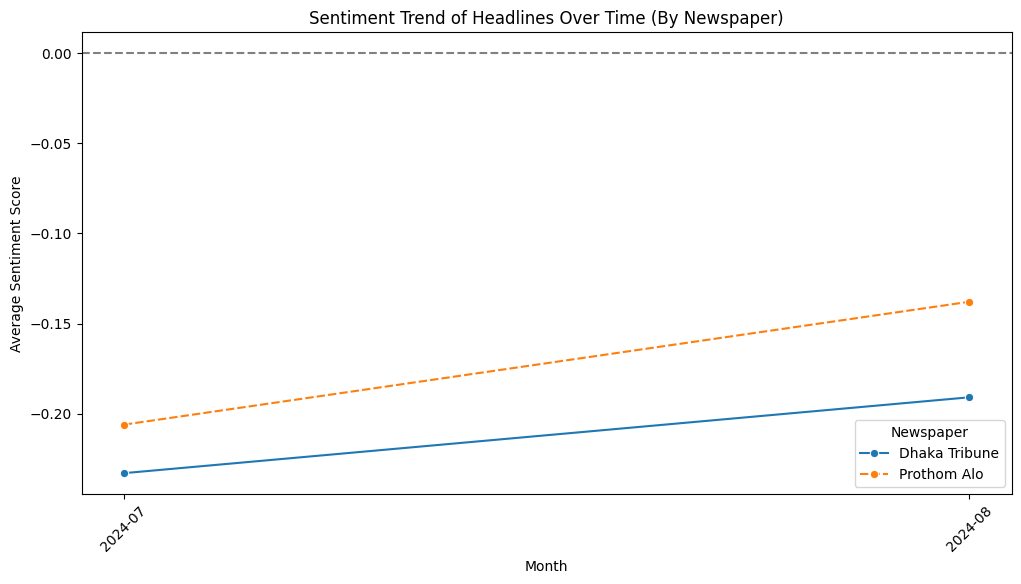

✅ Sentiment trend graph (per newspaper) saved as PNG: /content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.png


In [ ]:
# Define output path for image
output_image = "/content/drive/My Drive/Quota Movement Colab/Sentiment_Trend_By_Newspaper.png"

# Create sentiment trend graph for each newspaper
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trend, marker="o")

# Formatting
plt.xticks(rotation=45)
plt.axhline(0, linestyle="dashed", color="gray")  # Neutral sentiment line
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.title("Sentiment Trend of Headlines Over Time (By Newspaper)")
plt.legend(title="Newspaper")

# Save
plt.savefig(output_image, bbox_inches="tight", dpi=300)
plt.show()

print(f"✅ Sentiment trend graph (per newspaper) saved as PNG: {output_image}")


# **Thematic Analysis**

In [ ]:
import re
import pandas as pd

# Loading dataset
file_path = "/content/drive/My Drive/Quota Movement Colab/Cleaned_Dataset.xlsx"
df = pd.read_excel(file_path)

# thematic groups with relevant keywords
themes = {
    'Political/Activist': ['activist', 'protest', 'campaign', 'dissent', 'mobilization', 'demonstration', 'movement', 'advocacy', 'solidarity', 'block'],
    'Victimhood': ['suffering', 'victimized', 'targeted', 'oppressed', 'abused', 'discriminated', 'marginalized', 'wounded', 'harassed', 'students'],
    'Opposition': ['rebellion', 'clash', 'confrontation', 'struggle', 'resistance', 'defiance', 'counter', 'opposition', 'rebellious', 'block'],
    'Leadership': ['leaders', 'organizers', 'figureheads', 'representatives', 'spokesperson', 'chairperson', 'commanders', 'leadership', 'director'],
    'Social/Equality': ['rights', 'equality', 'justice', 'fairness', 'inclusivity', 'discrimination', 'diversity', 'empowerment', 'advocacy', 'oppression'],
    'Call to Action': ['must', 'demand', 'fight', 'urgency', 'mobilize', 'call', 'action', 'campaign', 'assert', 'push', 'pressure'],
    'Government and Authority': ['government', 'minister', 'official', 'authority', 'state', 'policy', 'administration', 'legislation', 'bureaucracy', 'regulation'],
    'Violence/Conflict': ['clashes', 'violence', 'bloodshed', 'conflict', 'riots', 'war', 'battle', 'skirmish', 'fighting', 'attacks', 'terror', 'injured', 'killed'],
    'Democracy and Rights': ['democracy', 'freedom', 'rights', 'civil liberties', 'constitution', 'election', 'vote', 'participation', 'liberty', 'representation'],
    'Public Opinion': ['public', 'opinion', 'reaction', 'perception', 'approval', 'disapproval', 'sentiment', 'survey', 'feedback', 'reaction']
}

# matching themes in headlines
def categorize_themes(headline, themes):
    headline = headline.lower()  # Convert to lowercase for case-insensitive matching
    categorized_themes = []

    for theme, keywords in themes.items():
        if any(re.search(r'\b' + keyword + r'\b', headline) for keyword in keywords):
            categorized_themes.append(theme)

    return categorized_themes

# Group the dataset by Newspaper (assuming the column name is 'Newspapers')
grouped_df = df.groupby('Newspaper')

# Dictionary to store thematic analysis results for each newspaper
newspaper_theme_counts = {}

# Loop through each group (newspaper) and performing thematic analysis
for newspaper, group in grouped_df:
    # List of headlines for the current newspaper
    headlines = group['Headlines'].tolist()

    # Debugging: Ensuring that all headlines are being processed
    print(f"\nProcessing newspaper: {newspaper}")
    print(f"Total headlines in {newspaper}: {len(headlines)}")

    # Initialize a dictionary to store theme counts for the current newspaper
    theme_counts = {theme: 0 for theme in themes.keys()}

    # Categorize headlines by themes
    for headline in headlines:
        categorized_themes = categorize_themes(headline, themes)
        for theme in categorized_themes:
            theme_counts[theme] += 1

    # Store results for the current newspaper
    newspaper_theme_counts[newspaper] = theme_counts

# Print out the thematic analysis for each newspaper
print("\n🔹 **Thematic Analysis by Newspaper:**")
for newspaper, theme_counts in newspaper_theme_counts.items():
    print(f"\n📍 **{newspaper}**:")
    for theme, count in theme_counts.items():
        print(f"{theme}: {count}")
# Save the results to a DataFrame
theme_df = pd.DataFrame(newspaper_theme_counts)

# Save the DataFrame as an Excel file
output_file_path = "/content/drive/My Drive/Quota Movement Colab/Thematic_Analysis_Results.xlsx"
theme_df.to_excel(output_file_path, sheet_name="Thematic Analysis")

# Display the saved file path
print(f"\nThematic analysis results saved at: {output_file_path}")



Processing newspaper: Dhaka Tribune
Total headlines in Dhaka Tribune: 927

Processing newspaper: Prothom Alo
Total headlines in Prothom Alo: 501

🔹 **Thematic Analysis by Newspaper:**

📍 **Dhaka Tribune**:
Political/Activist: 216
Victimhood: 2
Opposition: 141
Leadership: 0
Social/Equality: 23
Call to Action: 61
Government and Authority: 49
Violence/Conflict: 123
Democracy and Rights: 7
Public Opinion: 8

📍 **Prothom Alo**:
Political/Activist: 77
Victimhood: 3
Opposition: 62
Leadership: 1
Social/Equality: 15
Call to Action: 28
Government and Authority: 30
Violence/Conflict: 48
Democracy and Rights: 7
Public Opinion: 3

Thematic analysis results saved at: /content/drive/My Drive/Quota Movement Colab/Thematic_Analysis_Results.xlsx


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Convert the dictionary to a DataFrame for easier plotting
theme_df = pd.DataFrame(newspaper_theme_counts)

# Set the theme for better styling of the plots
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(14, 8))

# Set the bar width and the positions for the bars
bar_width = 0.35
index = np.arange(len(theme_df.index))  # Position of the themes on y-axis

# Plot the first newspaper's thematic analysis
plt.barh(index, theme_df[newspaper_1], bar_width, color="lightblue", label=newspaper_1)

# Plot the second newspaper's thematic analysis
plt.barh(index + bar_width, theme_df[newspaper_2], bar_width, color="lightcoral", label=newspaper_2)

# Set the labels, title, and other plot formatting
plt.xlabel('Number of Headlines', fontsize=12)
plt.ylabel('Themes', fontsize=12)
plt.title('Thematic Analysis Comparison Between Two Newspapers', fontsize=14)
plt.yticks(index + bar_width / 2, theme_df.index)  # Position the theme names in the middle
plt.legend(title="Newspapers")

# Show the plot
plt.tight_layout()

# Save the plot
output_file_path = "/content/drive/My Drive/Quota Movement Colab/Thematic_Analysis_Comparison.png"
plt.savefig(output_file_path)

# Display the plot
plt.show()

print(f"Plot saved at: {output_file_path}")


Plot saved at: /content/drive/My Drive/Quota Movement Colab/Thematic_Analysis_Comparison.png
